In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df_result_100 = pd.read_csv('./server/06212341_500_0.1_1_40result.csv').reset_index()
df_result_200 = pd.read_csv('./server/06212346_500_0.2_1_40result.csv').reset_index()
df_result_300 = pd.read_csv('./server/06212354_500_0.3_1_40result.csv').reset_index()
df_result_400 = pd.read_csv('./server/06220003_500_0.4_1_40result.csv').reset_index()
df_result_500 = pd.read_csv('./server/06220016_500_0.5_1_40result.csv').reset_index()
df_result_600 = pd.read_csv('./server/06220026_500_0.6_1_40result.csv').reset_index()
df_result_700 = pd.read_csv('./server/06220036_500_0.7_1_40result.csv').reset_index()
df_result_800 = pd.read_csv('./server/06220047_500_0.8_1_40result.csv').reset_index()
df_result_900 = pd.read_csv('./server/06220056_500_0.9_1_40result.csv').reset_index()
df_result_1000 = pd.read_csv('./server/06220105_500_1_1_40result.csv').reset_index()
dfs = [df_result_100, df_result_200, df_result_300, df_result_400, df_result_500, df_result_600, df_result_700, df_result_800, df_result_900, df_result_1000]

In [5]:
fnn_user = []
fnn_server = []
Random_user = []
Random_server = []
Greedy_user = []
Greedy_server = []
MCF_user = []
MCF_server = []
DRoEUA_user = []
DRoEUA_server = []
for df in dfs:
    fnn_user.append(df['fnn_user'].mean())
    fnn_server.append(df['fnn_server'].mean())
    Random_user.append(df['random_user'].mean())
    Random_server.append(df['random_server'].mean())
    Greedy_user.append(df['greedy_user'].mean())
    Greedy_server.append(df['greedy_server'].mean())
    MCF_user.append(df['mcf_user'].mean())
    MCF_server.append(df['mcf_server'].mean())
    DRoEUA_user.append(df['fuzzy_user'].mean())
    DRoEUA_server.append(df['fuzzy_server'].mean())

xlabel=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

fnn_user_scaled = [x * 100 for x in fnn_user]
Random_user_scaled = [x * 100 for x in Random_user]
Greedy_user_scaled = [x * 100 for x in Greedy_user]
MCF_user_scaled = [x * 100 for x in MCF_user]
DRoEUA_user_scaled = [x * 100 for x in DRoEUA_user]

fnn_server_scaled = [x * 100 for x in fnn_server]
Random_server_scaled = [x * 100 for x in Random_server]
Greedy_server_scaled = [x * 100 for x in Greedy_server]
MCF_server_scaled = [x * 100 for x in MCF_server]
DRoEUA_server_scaled = [x * 100 for x in DRoEUA_server]

print(fnn_user_scaled)
print(fnn_server_scaled)

[26.41000097990036, 56.186002790927894, 74.706003844738, 85.64600419998169, 86.88200372457504, 91.19400441646576, 93.31000465154648, 94.41800445318222, 95.18800467252731, 96.04000449180603]
[100.0, 100.0, 99.55000042915344, 97.57143211364746, 85.69230854511261, 94.21519207954407, 94.75281023979187, 92.74489563703537, 93.0535758137703, 92.01600396633148]


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

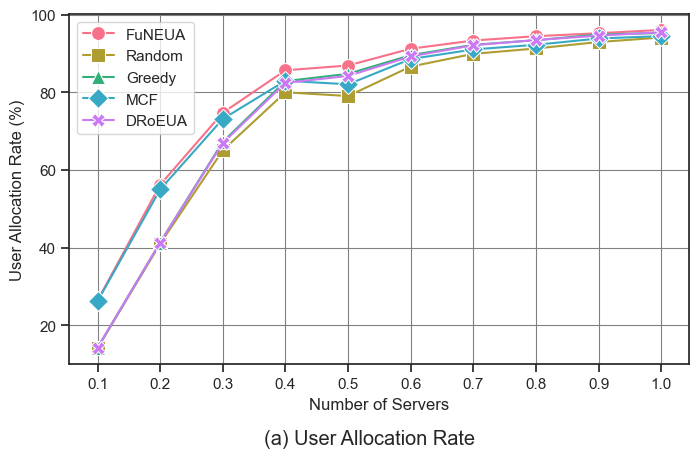

In [8]:
# 创建图形和子图
fig, ax = plt.subplots(figsize=(8, 5))
sns.set(style="ticks", rc={"lines.linewidth": 1.5})  # 调整线宽

palette = sns.color_palette("husl", 5)  # 选择一个有趣的调色板
# 定义不同的标记形状
markers = {"FuNEUA": "o", "Random": "s", "Greedy": "^", "MCF": "D", "DRoEUA": "X"}

# 绘制线条图，使用不同的标记形状
for name, data in [("FuNEUA", fnn_user_scaled), ("Random", Random_user_scaled), ("Greedy", Greedy_user_scaled),
                   ("MCF", MCF_user_scaled), ("DRoEUA", DRoEUA_user_scaled)]:
    sns.lineplot(x=xlabel, y=data, label=name, color=palette[list(markers.keys()).index(name)], 
                 marker=markers[name], markersize=10)

# 调整网格线的属性
plt.grid(axis='both', which='major', linestyle='-', linewidth=0.8, color='gray')
plt.grid(axis='both', which='minor', linestyle=':', linewidth=0.5, color='gray')

# 添加标题
plt.suptitle("(a) User Allocation Rate", x=0.5, y=0.05)  # 调整标题位置
# 调整图形布局，为标题腾出空间
plt.subplots_adjust(bottom=0.18)  # 根据需要调整bottom参数


plt.xlabel("Number of Servers", fontsize=12)
plt.ylabel("User Allocation Rate (%)", fontsize=12)  # 更新y轴标签以反映百分比
# 设置X轴刻度，确保所有标签都显示出来
plt.xticks(xlabel)
plt.savefig('server_user.svg', dpi=1000)
plt.show()

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

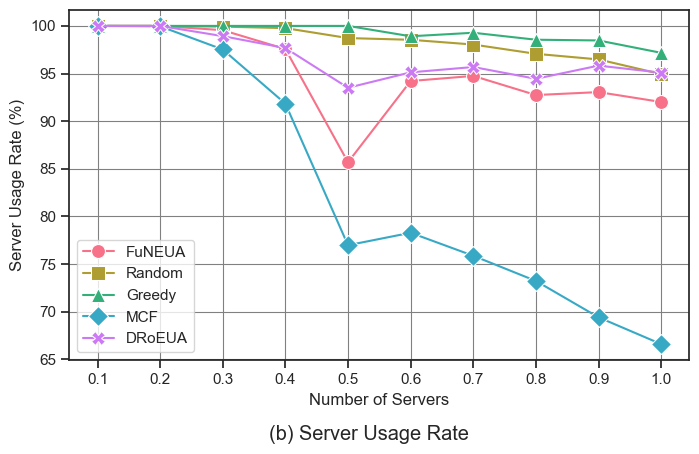

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.set(style="ticks", rc={"lines.linewidth": 1.5})  # 调整线宽
# sns.set_style("whitegrid")

palette = sns.color_palette("husl", 5)  # 选择一个有趣的调色板

markers = {"FuNEUA": "o", "Random": "s", "Greedy": "^", "MCF": "D", "DRoEUA": "X"}

# 绘制线条图，使用不同的标记形状
for name, data in [("FuNEUA", fnn_server_scaled), ("Random", Random_server_scaled), ("Greedy", Greedy_server_scaled),
                   ("MCF", MCF_server_scaled), ("DRoEUA", DRoEUA_server_scaled)]:
    sns.lineplot(x=xlabel, y=data, label=name, color=palette[list(markers.keys()).index(name)], 
                 marker=markers[name], markersize=10)

# 调整网格线的属性
plt.grid(axis='both', which='major', linestyle='-', linewidth=0.8, color='gray')
plt.grid(axis='both', which='minor', linestyle=':', linewidth=0.5, color='gray')

# 添加标题
plt.suptitle("(b) Server Usage Rate", x=0.5, y=0.05)  # 调整标题位置
# 调整图形布局，为标题腾出空间
plt.subplots_adjust(bottom=0.18)  # 根据需要调整bottom参数

plt.xlabel("Number of Servers", fontsize=12)
plt.ylabel("Server Usage Rate (%)", fontsize=12)  # 更新y轴标签以反映百分比
# 设置X轴刻度，确保所有标签都显示出来
plt.xticks(xlabel)
plt.savefig('server_server.svg', dpi=1000)
plt.show()